In [ ]:
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

In [5]:
# probability
st.norm.cdf(4)

0.9999683287581669

In [6]:
# signifikanz niveau
st.t.cdf(4)

TypeError: _parse_args() missing 1 required positional argument: 'df'

In [14]:
sample = st.norm.rvs(loc=100, scale=26, size=100)

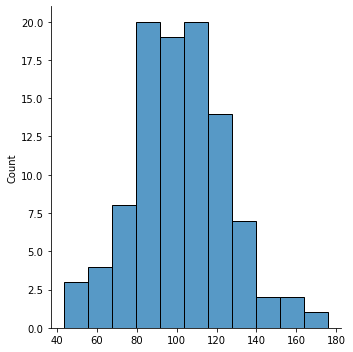

In [15]:
sns.displot(sample)

In [26]:
sample = st.expon.rvs(scale=10, size=100, random_state=42)

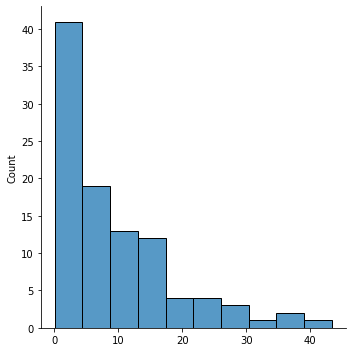

In [27]:
sns.displot(sample)

In [110]:
simulated_layers = []
temp_x = []
temp_y = []
for x in range(100000):
    simulated_layers.append(st.norm.rvs(size=8, loc=12, scale=1))
    if x % 1000 == 0:
        heights = []
        for layer in simulated_layers:
            heights.append(layer.sum())

        temp_x.append(x)
        temp_y.append(sum(list(filter(lambda h: h > 104, heights))) / len(heights))

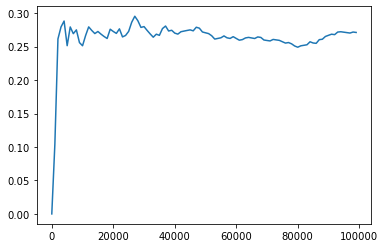

In [111]:
plt.plot(temp_x, temp_y)

In [116]:
simulated_layers = []
temp_x = []
temp_y = []
for x in range(100000):
    simulated_layers.append(st.norm.rvs(size=8, loc=12, scale=1))
    if x % 1000 == 0:
        heights = []
        for layer in simulated_layers:
            heights.append(int(layer.sum()))

        probability_doesnt_fit = sum(list([1 for height in heights > 104])) / len(heights)

        temp_x.append(x)
        temp_y.append(probability_doesnt_fit)

TypeError: '>' not supported between instances of 'list' and 'int'

In [30]:
simulated_layers

[array([12.29009431, 12.2319791 , 10.5206518 , 12.36881886, 12.25472348,
        11.43406658, 11.37085182, 11.71701861]),
 array([13.42214581, 11.94147205, 11.7192542 , 13.82424766, 12.28930905,
        12.66135629, 13.14581042, 12.69589062]),
 array([12.63705625, 13.06228948, 11.59658448, 12.76209495, 12.7485209 ,
        14.09375568, 11.53925918, 10.94400294]),
 array([11.63962326,  9.81883545, 13.41332329, 11.10783008, 12.90468816,
        12.39224464, 13.02508185, 11.26806587]),
 array([12.39952443, 10.69068765, 12.12183663, 10.48299335, 11.40558459,
        12.83268258, 11.08771215, 13.31694622]),
 array([12.87515895, 13.71157013, 11.66136413, 14.43251015, 10.98429679,
        13.39690407, 12.40924335, 11.58771475]),
 array([10.37114605, 11.21945895, 12.562093  , 10.68603772, 10.01722914,
        10.4664299 , 10.47895715, 13.14311322]),
 array([ 9.67919308, 11.86809272, 12.18808291, 12.5846168 , 10.92977008,
        13.33795328, 10.77543838, 14.2483638 ]),
 array([11.6525906 , 11.

In [31]:
heights = []
for layer in simulated_layers:
    heights.append(layer.sum())

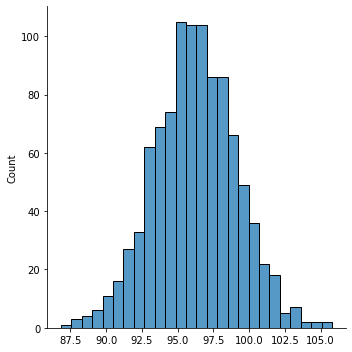

In [33]:
sns.displot(heights)

In [113]:
sum(list(filter(lambda h: h > 104, heights))) / len(heights)

0.27110399887049763

# Fussgängerbrücke

In [58]:
runs = 1000000

In [70]:
bridge_resistance = np.array(st.norm.rvs(loc=5000, scale=150, size=runs))

# scale for expon is defined as: 1 / lambda
bridge_load = np.array(st.expon.rvs(scale=(1 / 0.001), size=runs))

In [71]:
sum(bridge_load > bridge_resistance) / runs

0.006853

# Buchen vs. Tannen Höhe

In [75]:
tannen = [45, 49, 47, 38, 53, 30, 34]

In [77]:
np.size(tannen)

7

In [78]:
np.mean(tannen)

42.285714285714285

In [79]:
# Standard Error
np.std(tannen, ddof=1) / np.sqrt(np.size(tannen))

3.190120804656043

In [83]:
buchen = [41, 37, 32, 24, 45, 23, 35, 41, 24]

In [84]:
np.size(buchen)

9

In [85]:
np.mean(buchen)

33.55555555555556

In [86]:
np.std(buchen, ddof=1) / np.sqrt(np.size(buchen))

2.769431906803226

In [93]:
t_value = (np.mean(tannen) - np.mean(buchen)) / np.sqrt((np.var(tannen, ddof=1)/np.size(tannen)) + (np.var(buchen, ddof=1)/np.size(buchen)))

In [100]:
# degrees of freedom for both samples
(np.size(tannen) + np.size(buchen)) - 2

14

In [101]:
# 14 = number of observations in both samples
st.t.cdf(t_value, 14)

0.9711028862893305

In [102]:
p_value = (1 - st.t.cdf(t_value, 14)) * 2
p_value

0.057794227421338995